# Titanic analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing test and train datasets

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.loc[train["Age"].idxmax()]

PassengerId                                     631
Survived                                          1
Pclass                                            1
Name           Barkworth, Mr. Algernon Henry Wilson
Sex                                            male
Age                                            80.0
SibSp                                             0
Parch                                             0
Ticket                                        27042
Fare                                           30.0
Cabin                                           A23
Embarked                                          S
Name: 630, dtype: object

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Importing Data

1) Create training and testing dataframes from the downloaded csv files. Find

A) number of rows in training and test sets

In [6]:
print("Number of rows in train dataset: ",len(train))
print("Number of rows in train dataset: ",len(test))

Number of rows in train dataset:  891
Number of rows in train dataset:  418


B) display the structure of the dataset along with the datatypes of the fields

In [7]:
print("Structure of Datasets train\n\n",str(train))

Structure of Datasets train

      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [8]:
print("Datatype of train dataset: \n\n", train.dtypes)

Datatype of train dataset: 

 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [62]:
print("Structure of Datasets test\n\n",str(test))

Structure of Datasets test

      PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0  

In [10]:
print("Datatype of train dataset: \n\n", test.dtypes)

Datatype of train dataset: 

 PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


# Data cleaning

1. Analyse the data and identify which columns are not relevant for survivor prediction task. Drop those columns from the dataframes.

In [11]:
dptrain = train.drop(["Embarked", "Ticket","Cabin"], axis = 1)
dptrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000


In [12]:
dptest = test.drop(["Embarked", "Ticket","Pclass","Cabin"], axis = 1)
dptest

,PassengerId,Name,Sex,Age,SibSp,Parch,Fare
0,892,"Kelly, Mr. James",male,34.5,0,0,7.8292
1,893,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000
2,894,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875
3,895,"Wirz, Mr. Albert",male,27.0,0,0,8.6625
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,1305,"Spector, Mr. Woolf",male,NaN,0,0,8.0500
414,1306,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000
415,1307,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500
416,1308,"Ware, Mr. Frederick",male,NaN,0,0,8.0500


2. Check how many columns have missing values in them (NA) and how many have NaN values. Logically impute the dataset.

In [13]:
print("Columns with missing values and count of NaN values: in train datasets: \n\n",dptrain.isnull().sum(),"\n")

Columns with missing values and count of NaN values: in train datasets: 

 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64 



In [14]:
dptrain['Age'] = dptrain['Age'].replace(np.nan, dptrain["Age"].mean())
dptrain.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [15]:
dptrain.duplicated().sum()

0

In [16]:
print("Columns with missing values and count of NaN values: in test datasets: \n\n",dptest.isnull().sum())

Columns with missing values and count of NaN values: in test datasets: 

 PassengerId     0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
dtype: int64


In [17]:
dptest['Age'] = dptest['Age'].replace(np.nan, dptest["Age"].mean())
dptest['Fare'] = dptest['Fare'].replace(np.nan, dptest["Fare"].mean())
dptest.isnull().sum()

PassengerId    0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [18]:
dptest.duplicated().sum()

0

3. Identify any categorical valued columns (non-numeric) and convert them to numeric.
Male = 0
Female = 1

In [19]:
dptrain['Sex'].replace(['male','female'],[0,1], inplace = True)
dptrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,30.0000


In [20]:
dptest['Sex'].replace(['male','female'],[0,1], inplace = True)
dptest

,PassengerId,Name,Sex,Age,SibSp,Parch,Fare
0,892,"Kelly, Mr. James",0,34.50000,0,0,7.8292
1,893,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,7.0000
2,894,"Myles, Mr. Thomas Francis",0,62.00000,0,0,9.6875
3,895,"Wirz, Mr. Albert",0,27.00000,0,0,8.6625
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,12.2875
...,...,...,...,...,...,...,...
413,1305,"Spector, Mr. Woolf",0,30.27259,0,0,8.0500
414,1306,"Oliva y Ocana, Dona. Fermina",1,39.00000,0,0,108.9000
415,1307,"Saether, Mr. Simon Sivertsen",0,38.50000,0,0,7.2500
416,1308,"Ware, Mr. Frederick",0,30.27259,0,0,8.0500


# Exploratory Analysis (On training set):

1. Show how many passengers were male and female and plot using matplotlib. On the same plot depict the people who survived and who died. Make accurate axis and legend. Save the plot in a png file.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

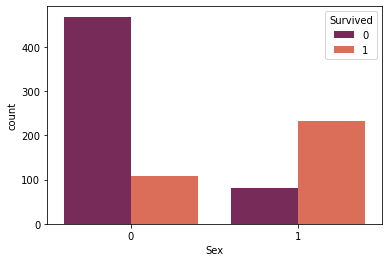

In [21]:
sns.countplot('Sex', hue='Survived', data=dptrain, palette = "rocket")

Text(0, 0.5, 'Survived and Died')

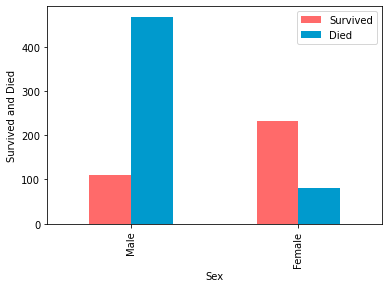

In [22]:
df = train.groupby(["Sex","Survived"])["Survived"].count()
df1 = pd.DataFrame({
    'Sex': ['Male', 'Female'],
    'Survived': [df[3],df[1]],
    'Died': [df[2],df[0]]
})

df1.plot(x='Sex', y=["Survived", "Died"], kind="bar", color=['#FF6A6A','#009ACD'])
plt.ylabel("Survived and Died")

2. Show the histogram of the count of passengers who died (according to their age). Age ranges should be <10, 10 to <20, 20 to <30 and so on.

Text(0, 0.5, 'Count')

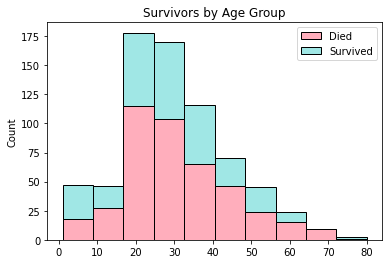

In [23]:
df1 = train[train['Survived'] == 0]['Age']
df2 = train[train['Survived'] == 1]['Age']
max_age = max(train['Age'])
plt.hist([df1, df2], 
             bins=10, 
             range=(1, max_age), 
             stacked=True,edgecolor = "black", color=['#FFAEBC', '#A0E7E5'])
plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Age Group')
plt.ylabel('Count')

How many minor children died and how many of them survived (<16 years). Create a separate plot for the passengers who survived.

Total Survived Passengers less than 16 years are 49 .


Text(0.5, 0, 'Below 16')

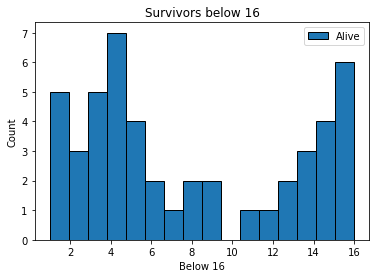

In [24]:
df2 = train[train['Survived'] == 1]['Age']
print("Total Survived Passengers less than 16 years are", train['Age'][(train["Survived"] == 1) & (train["Age"] < 16)].count(), ".")

max_age = max(train['Age'])
plt.hist(df2, 
             bins=16, 
             range=(1, 16), 
             stacked=True,edgecolor = "black")
plt.legend(('Alive', 'Survived'), loc='best')
plt.title('Survivors below 16')
plt.ylabel('Count')
plt.xlabel("Below 16")

3. Show the distribution on the count of passengers who died (according to the fare they paid). Choose fare ranges such that the mean lies in the middle range.

                   Survived
FareClass                  
(-0.001, 7.775]         156
(7.775, 8.662]          152
(8.662, 14.454]         139
(14.454, 26.0]          149
(26.0, 52.369]          146
(52.369, 512.329]       149


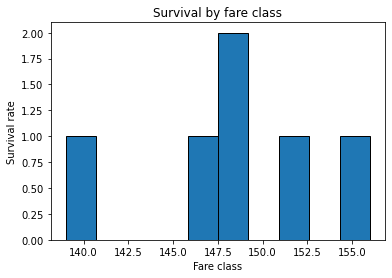

In [25]:
dptrain["FareClass"] = pd.qcut(dptrain['Fare'], 6)
fare_survival = dptrain[['FareClass', 'Survived']].groupby(['FareClass']).count()
print(fare_survival)
fig, ax = plt.subplots()
plt.hist(fare_survival, bins=10,  edgecolor = "black")
ax.set(xlabel='Fare class', ylabel='Survival rate',title='Survival by fare class')
plt.show()

Give the percentage of passengers who survived as had paid more than $100. Justify if there was any bias in the rescue operation towards the rich (Yes/No/not enough evidence).

In [26]:
survived = len(dptrain[(dptrain["Survived"]==1)])
paida100 = len(dptrain[(dptrain['Survived']==1) & (dptrain['Fare']>100)])
percentage = (paida100/survived)*100
print("Percentage: ",round(percentage, 3),"%")

Percentage:  11.404 %


In [27]:
pd.pivot_table(dptrain, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.415100,22.117887,0.329690,0.553734
1,28.549778,48.395408,0.464912,0.473684


<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

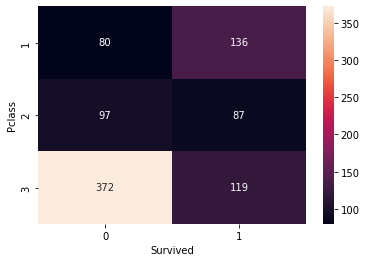

In [28]:
group = dptrain.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
sns.heatmap(pclass_survived, annot = True, fmt ="d")

 People who paid higher fare rates(here avg of 48) were more likely to survive, more than double. And from the above heat map we can see that those people who belongs to class 1 have more number of survival. Thus the rich survived, which is kind of a sad story in this scenario.

4. Plot graphs showing correlation between different pairs of attributes. Infer if there is any significant correlation between survivors and any specific feature.

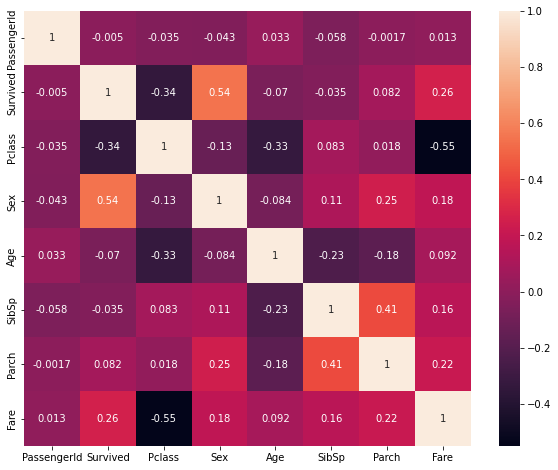

Their is a negatively moderate correlation between Survived and PClass as class 1 have more survival rate.
Their is a moderate correlation between Survived and Sex
As female was more preferred to survived.


In [35]:
plt.figure(figsize = (10,8))
sns.heatmap(dptrain.corr(), annot=True)
plt.show()
print("Their is a negatively moderate correlation between Survived and PClass as class 1 have more survival rate.\nTheir is a moderate correlation between Survived and Sex\nAs female was more preferred to survived.")

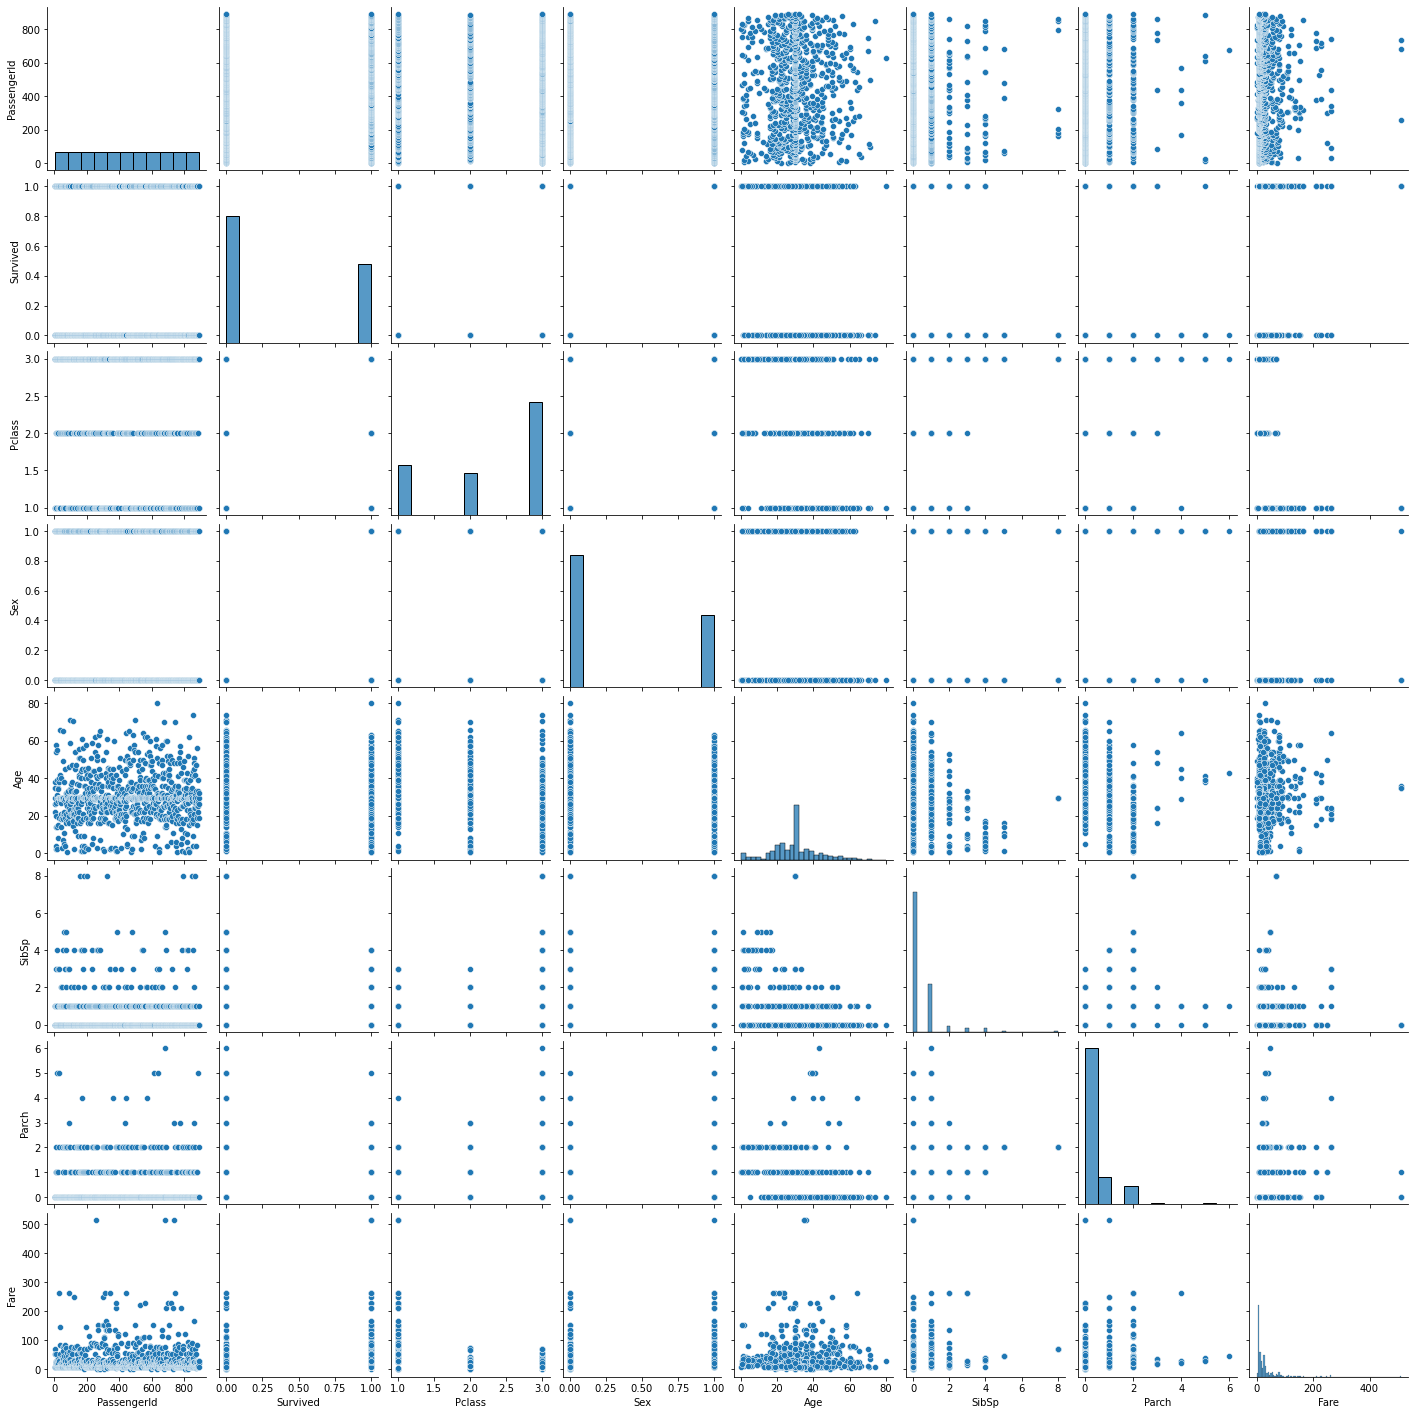

In [43]:
sns.pairplot(dptrain, kind="scatter")
plt.show()

5. Find the number of passengers who were married.

In [31]:
dptrain['name_title'] = dptrain.Name.apply(lambda x: x.split(',')[1]
                                                        .split('.')[0].strip())
dptrain['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

In [46]:
dptrain.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


Only 38% people survived.

In [48]:
dptrain[dptrain['Name'].str.contains("Capt")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,FareClass,name_title
745,746,0,1,"Crosby, Capt. Edward Gifford",0,70.0,1,1,71.0,"(52.369, 512.329]",Capt


The Captain of titanic dies by saving many.

In [49]:
dptrain.groupby(['Sex']).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
0,454.147314,0.188908,2.389948,30.505824,0.429809,0.235702,25.523893
1,431.028662,0.742038,2.159236,28.216730,0.694268,0.649682,44.479818


74% of the women survived, while only 18% of men survived.

In [50]:
dptrain[dptrain['Age']<18].groupby(['Sex', 'Pclass']).mean()

PassengerId  Survived        Age     SibSp     Parch        Fare
Sex Pclass                                                                  
0   1        526.500000  1.000000   8.230000  0.500000  2.000000  116.072900
    2        527.818182  0.818182   4.757273  0.727273  1.000000   25.659473
    3        437.953488  0.232558   9.963256  2.069767  1.000000   22.752523
1   1        525.375000  0.875000  14.125000  0.500000  0.875000  104.083337
    2        369.250000  1.000000   8.333333  0.583333  1.083333   26.241667
    3        374.942857  0.542857   8.428571  1.571429  1.057143   18.727977

Children below 18 years of age have higher chances of surviving.

# Person travelling with others had more survival possibility?

In [51]:
is_not_alone = (dptrain.SibSp + dptrain.Parch) >= 1
passengers_not_alone = dptrain[is_not_alone]

is_alone = (dptrain.SibSp + dptrain.Parch) == 0
passengers_alone = dptrain[is_alone]

print('Not alone - describe')
display(passengers_not_alone.describe())
print('Alone - describe')
display(passengers_alone.describe())

Not alone - describe


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,427.796610,0.505650,2.169492,0.531073,26.821839,1.316384,0.960452,48.832275
std,259.122836,0.500676,0.864520,0.499740,14.854927,1.420774,1.039512,55.307615
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,6.495800
25%,195.000000,0.000000,1.000000,0.000000,17.000000,1.000000,0.000000,18.000000
50%,419.000000,1.000000,2.000000,1.000000,29.000000,1.000000,1.000000,27.750000
75%,645.750000,1.000000,3.000000,1.000000,36.000000,1.000000,2.000000,59.044800
max,889.000000,1.000000,3.000000,1.000000,70.000000,8.000000,6.000000,512.329200


Alone - describe


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.0,537.0,537.000000
mean,458.000000,0.303538,2.400372,0.234637,31.595871,0.0,0.0,21.242689
std,255.714174,0.460214,0.804511,0.424167,11.238419,0.0,0.0,42.223510
min,3.000000,0.000000,1.000000,0.000000,5.000000,0.0,0.0,0.000000
25%,235.000000,0.000000,2.000000,0.000000,24.000000,0.0,0.0,7.775000
50%,466.000000,0.000000,3.000000,0.000000,29.699118,0.0,0.0,8.137500
75%,681.000000,1.000000,3.000000,0.000000,35.000000,0.0,0.0,15.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,0.0,0.0,512.329200


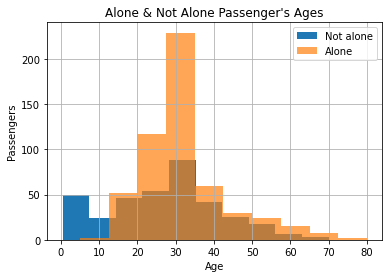

In [59]:
passengers_not_alone.Age.hist(label='Not alone')
passengers_alone.Age.hist(label='Alone', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Passengers')
plt.legend()
plt.title('Alone & Not Alone Passenger\'s Ages')
plt.show()

    1) Those in age range of 0-10, that is kids, were not alone
    2) There however is one kid age 5 who was alone
    3) There was an 80 year old person also who was alone
    4) 537 passengers were alone, whereas 354 were in company